# LOAN ELIGIBILITY PREDICTION

In [2]:
# Importing Library
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

### Data collection and processing


In [3]:
# Loading the data set into panda data frame
loan_dataset = pd.read_csv("dataset.csv")

In [4]:
type(loan_dataset)

pandas.core.frame.DataFrame

###  Printing the first five rows of dataset

In [5]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


###  Number of Rows and Columns

In [6]:
loan_dataset.shape

(614, 13)

###  Statiscal measures

In [7]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# Number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

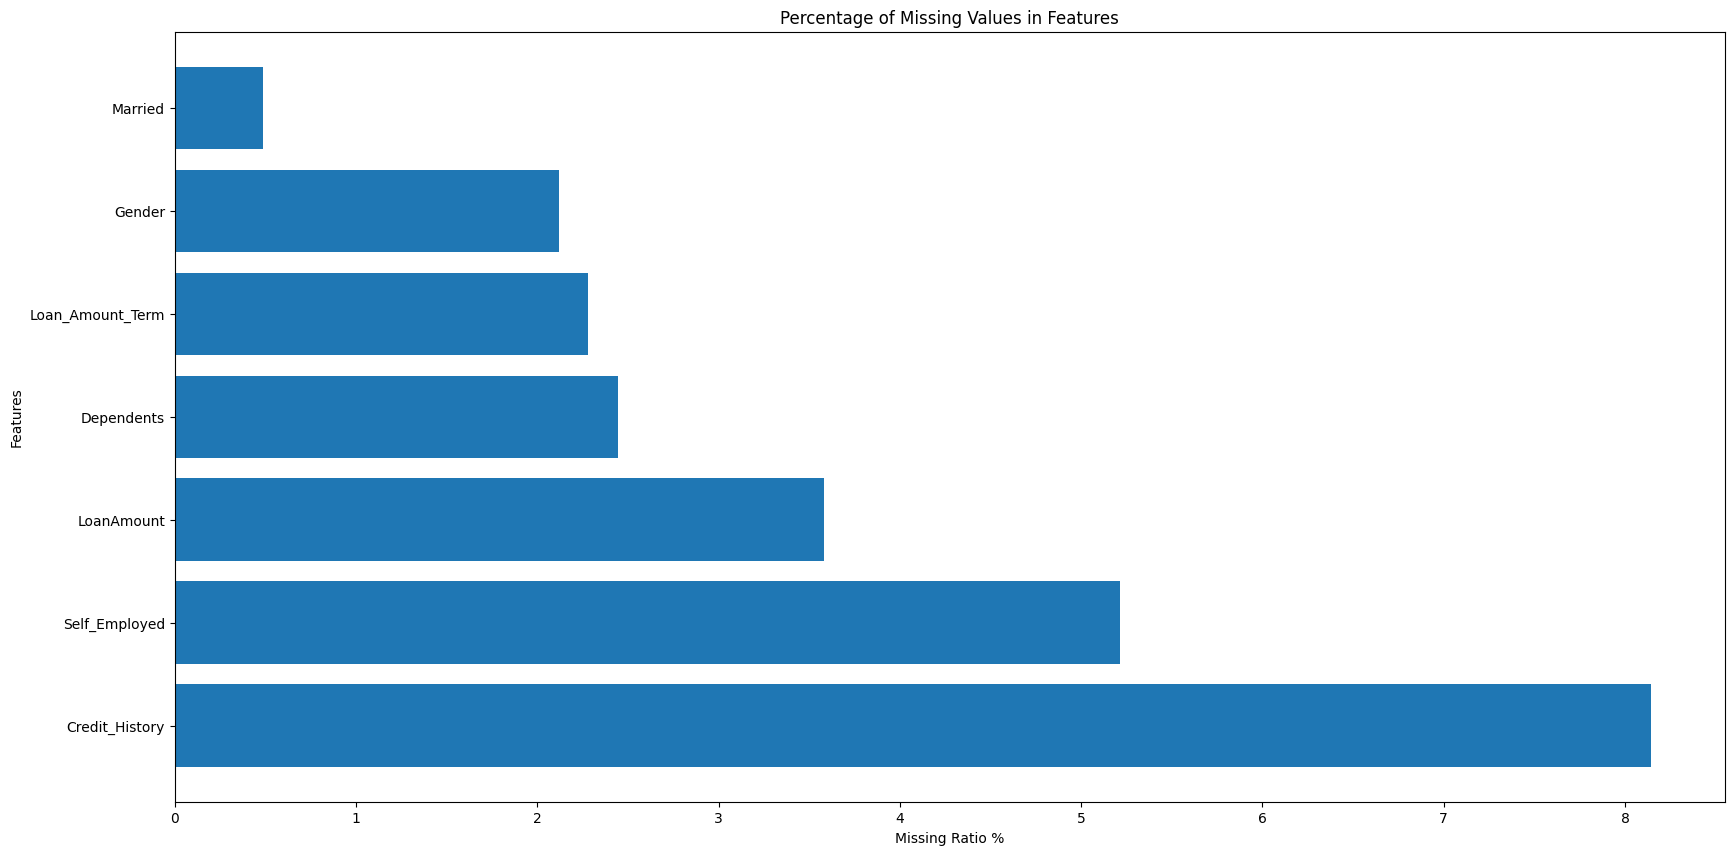

In [9]:
import matplotlib.pyplot as plt

def plot_bef(df):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %': na_df})
        # Plotting
        plt.figure(figsize=(20, 10))
        plt.barh(missing_data.index, missing_data['Missing Ratio %'])
        plt.xlabel('Missing Ratio %')
        plt.ylabel('Features')
        plt.title('Percentage of Missing Values in Features')
        plt.show()
    else:
        print('No missing values found')

plot_bef(loan_dataset)


### Dropping the missing values

In [10]:
# Dropping the missing values in a dataset
loan_dataset = loan_dataset.dropna()

In [11]:
# After droping the missing values  lets check if any values is missing the data set
# Number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Label encoding

In [12]:
# Replacing the Loan_status values in (Y / N)  format  to 1 and 0 format.
loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}},inplace = True)

C:\Users\UTHSAV K\AppData\Local\Temp\ipykernel_17840\2822580274.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}},inplace = True)


### Print the first five rows of dataset 

In [13]:
# Printing the first five rows of dataset to check whether the values of Loan_status is changed or not
loan_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


### Dependent column values

In [14]:
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [15]:
# Replacing the values of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value = 4)

In [16]:
# Again print the Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

## Data visulization

### Education Status and Loan Status

### Marital status and Loan Status

## convert categorial columns to numerical values

In [17]:
# convert the categorial columns (male&female and Graduate&NonGraduate and SelfEmployed and Property_Area and Education) to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace = True)

C:\Users\UTHSAV K\AppData\Local\Temp\ipykernel_17840\4271454344.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


### Print the first five rows of dataset to check the changed data

In [18]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


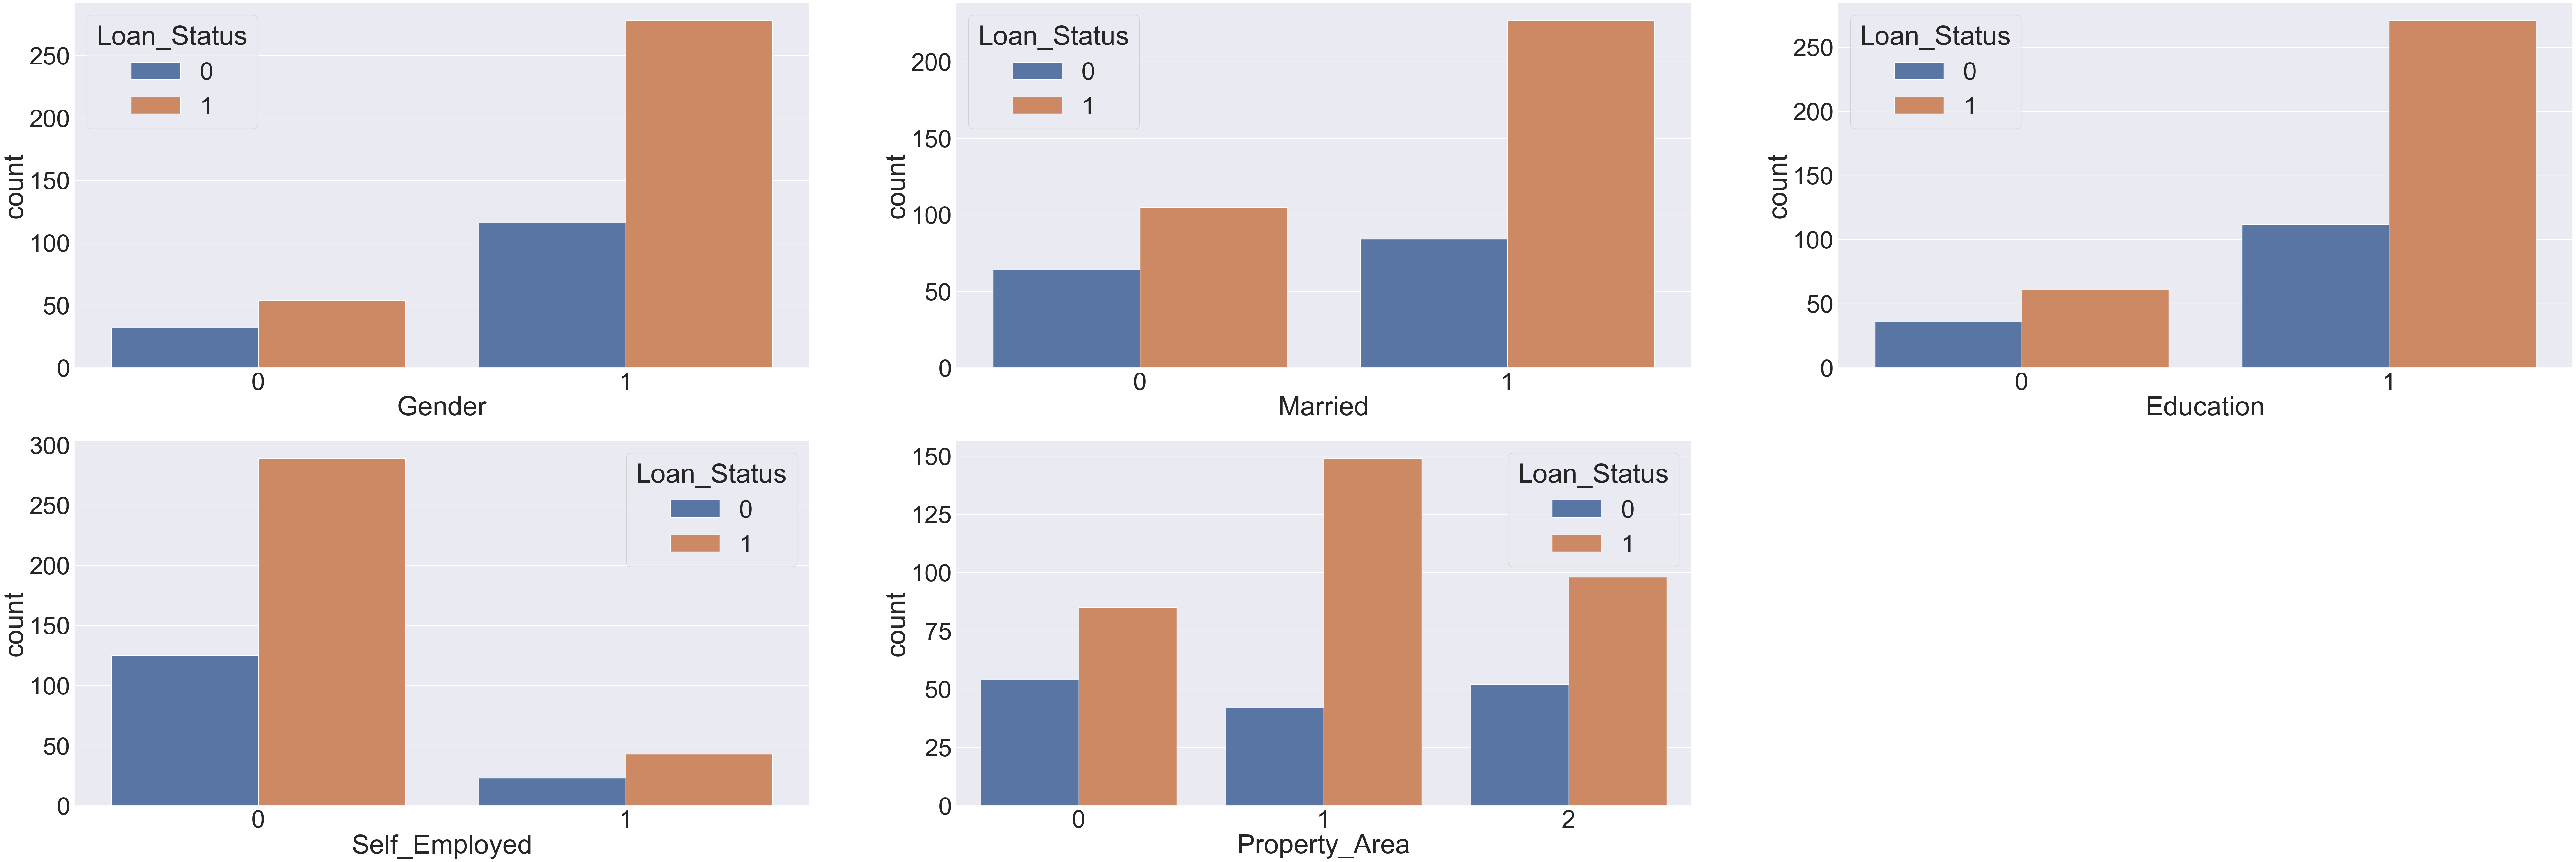

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and font scale
plt.figure(figsize=(100, 50))
sns.set(font_scale=5)

# Subplot 1: Gender and Loan Status
plt.subplot(331)
sns.countplot(x='Gender', hue='Loan_Status', data=loan_dataset)

# Subplot 2: Marital Status and Loan Status
plt.subplot(332)
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)

# Subplot 3: Education and Loan Status
plt.subplot(333)
sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset)

# Subplot 4: Self Employed and Loan Status
plt.subplot(334)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_dataset)

# Subplot 5: Property Area and Loan Status
plt.subplot(335)
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_dataset)

plt.show()


In [20]:
# Separate the data and Label
X = loan_dataset.drop(columns = ['Loan_ID','Loan_Status'],axis = 1)
# if we want to remove column then axis= 1  or if we want to remove row then axis = 0
Y = loan_dataset['Loan_Status']

In [21]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

## Split the data into Training_data and Test_data

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [23]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


# Training the  model :

##                               Support vector Machine Model

In [24]:
classifier = svm.SVC(kernel = 'linear')

In [25]:
# Training the support vector machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

## Model Evaluation

### Accurracy score on traininig data

In [25]:
# Accurracy score on traininig data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [26]:
print('Accuracy on training data : ',training_data_accuracy)

Accuracy on training data :  0.7986111111111112


### Accurracy score on test data

In [33]:
# Accurracy score on testing data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [34]:
#print accuracy on test data
print('Accuracy on test data : ',test_data_accuracy)

Accuracy on test data :  0.8333333333333334


###  The test data accuracy is 83.33%

# Building the predictive model

In [35]:
# Taking user input for loan prediction
def predict_loan_status():
    # Taking input from user
    print("\nEnter the details for loan prediction:")
    gender = int(input("Gender (Male: 1, Female: 0): "))
    married = int(input("Married (Yes: 1, No: 0): "))
    dependents = int(input("Number of Dependents: "))
    education = int(input("Education (Graduate: 1, Not Graduate: 0): "))
    self_employed = int(input("Self Employed (Yes: 1, No: 0): "))
    applicant_income = float(input("Applicant Income: "))
    coapplicant_income = float(input("Coapplicant Income: "))
    loan_amount = float(input("Loan Amount: "))
    loan_amount_term = float(input("Loan Amount Term: "))
    credit_history = float(input("Credit History (1.0 or 0.0): "))
    property_area = int(input("Property Area (Rural: 0, Semiurban: 1, Urban: 2): "))
    
    # Making prediction
    input_data = [[gender, married, dependents, education, self_employed, applicant_income,
                   coapplicant_income, loan_amount, loan_amount_term, credit_history, property_area]]
    loan_status = classifier.predict(input_data)
    
    # Displaying prediction
    if loan_status[0] == 1:
        print("\nThe loan is likely to be approved.")
    else:
        print("\nThe loan is likely to be rejected.")

# Calling the function for prediction
predict_loan_status()



Enter the details for loan prediction:


Gender (Male: 1, Female: 0):  1
Married (Yes: 1, No: 0):  1
Number of Dependents:  1
Education (Graduate: 1, Not Graduate: 0):  1
Self Employed (Yes: 1, No: 0):  1
Applicant Income:  3000
Coapplicant Income:  1500
Loan Amount:  350
Loan Amount Term:  360
Credit History (1.0 or 0.0):  1
Property Area (Rural: 0, Semiurban: 1, Urban: 2):  2



The loan is likely to be approved.


C:\Users\UTHSAV K\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
